## Initialize and Imports

In [22]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as patches
from tqdm.auto import tqdm
from numba import jit
import sys
sys.path.append(r'C:\Users\LHQS\Desktop\Austin\eHe Project\FEM\Channel Density (4-25)')
from dxfReader import DXFreader
from scipy.interpolate import griddata

density  = np.loadtxt('step-6_density.txt',skiprows=2)
EzField  = np.loadtxt('step-6_pressing.txt',skiprows=1)
ExField  = np.loadtxt('step-6_xfield.txt',skiprows=1)
params   = np.loadtxt('step-6_params.txt',skiprows=1)

Ez_3D    = np.loadtxt('step-6_Eyfield.txt',skiprows=0)
Ex_3D    = np.loadtxt('step-6_Exfield.txt',skiprows=0)
Ez_3D_nE = np.loadtxt('step-6_Eyfield_noE.txt',skiprows=0)
Ex_3D_nE = np.loadtxt('step-6_Exfield_noE.txt',skiprows=0)


# Extract parameters
V_ch    = params[:,0]
width   = params[:,1]
ns_mean = params[:,2]
ns_max  = params[:,3]
nl_mean = params[:,4]
spacing = params[:,5]
nrows   = params[:,6]
C_ch    = params[:,7]
C_gt    = params[:,8]


plt.rc('font', size = 20)
plt.rcParams['axes.linewidth'] = 3 

Ez_x = Ez_3D[:,0]
Ez_z = Ez_3D[:,1]
Ez_V = Ez_3D[:,2]
Ez_M = Ez_3D[:,3]

Ex_x = Ex_3D[:,0]
Ex_z = Ex_3D[:,1]
Ex_V = Ex_3D[:,2]
Ex_M = Ex_3D[:,3]

EzN_x = Ez_3D_nE[:,0]
EzN_z = Ez_3D_nE[:,1]
EzN_V = Ez_3D_nE[:,2]
EzN_M = Ez_3D_nE[:,3]

ExN_x = Ex_3D_nE[:,0]
ExN_z = Ex_3D_nE[:,1]
ExN_V = Ex_3D_nE[:,2]
ExN_M = Ex_3D_nE[:,3]

Ez_shaped = Ez_M.reshape(len(np.unique(Ez_V)),len(np.unique(Ez_x)),len(np.unique(Ez_z)))
Ez_matrix = Ez_shaped.transpose(1,2,0)

Ex_shaped = Ex_M.reshape(len(np.unique(Ex_V)),len(np.unique(Ex_x)),len(np.unique(Ex_z)))
Ex_matrix = Ex_shaped.transpose(1,2,0)

EzN_shaped = EzN_M.reshape(len(np.unique(EzN_V)),len(np.unique(EzN_x)),len(np.unique(EzN_z)))
EzN_matrix = EzN_shaped.transpose(1,2,0)

ExN_shaped = ExN_M.reshape(len(np.unique(ExN_V)),len(np.unique(ExN_x)),len(np.unique(ExN_z)))
ExN_matrix = ExN_shaped.transpose(1,2,0)

## Vertical Electric Field (with electrons)

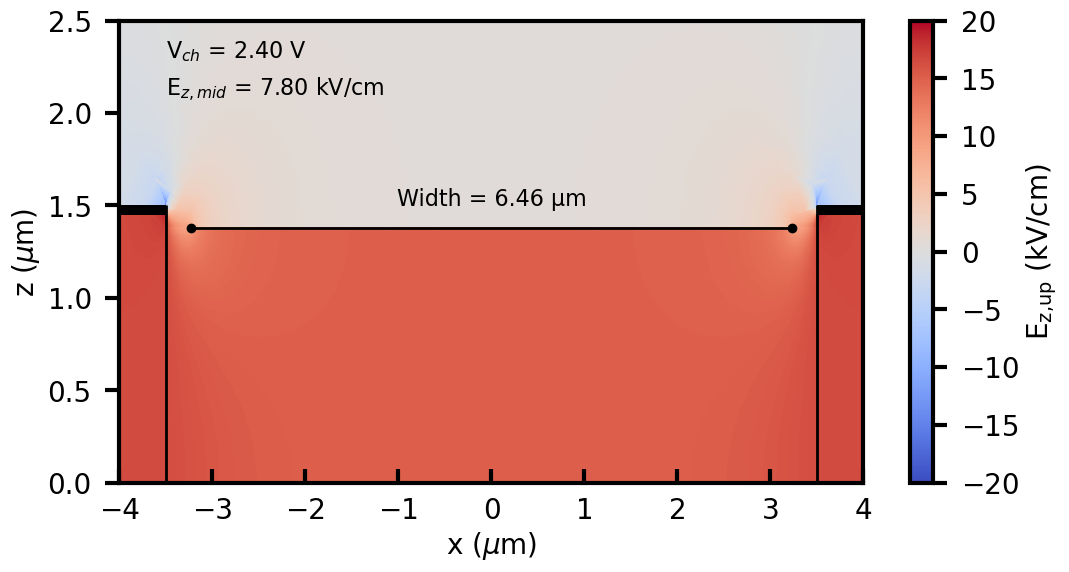

In [5]:
index = 42

fig, ax = plt.subplots(figsize=(12,6))
cmsh = plt.pcolormesh(np.unique(Ez_x),np.unique(Ez_z), Ez_matrix[:,:,index].T*1e-2*1e-3, shading='nearest', cmap='coolwarm', vmin=-20, vmax=20)
cbar = plt.colorbar(cmsh, label=r'E$_{\text{z,up}}$ (kV/cm)')

plt.ylim(0,2.5);
plt.xlim(-4,4)

plt.vlines( 3.5, 0, 1.5, color='black', linestyle='-', lw=2);
plt.vlines(-3.5, 0, 1.5, color='black', linestyle='-', lw=2);
plt.hlines(1.38, -width[index]/2, width[index]/2, color='black', linestyle='-', lw=2);

if width[index] > 0:
    plt.plot( width[index]/2, 1.38, 'o', markersize=6, color='black');
    plt.plot(-width[index]/2, 1.38, 'o', markersize=6, color='black');

E_below = Ez_matrix[500,274,index].T*1e-2*1e-3 #kV/cm at z = 1.37 um
E_above = Ez_matrix[500,282,index].T*1e-2*1e-3 #kV/cm at z = 1.39 um
E_avg   = (E_below + E_above)/2

plt.text(-3.5, 2.3, f'V$_{{ch}}$ = {V_ch[index]:.2f} V', color='black', fontsize=16, ha='left')
plt.text(-3.5, 2.1, f'E$_{{z,mid}}$ = {E_avg:.2f} kV/cm', color='black', fontsize=16, ha='left')

plt.text(0, 1.5, f'Width = {width[index]:.2f} μm', color='black', fontsize=16, ha='center')

Lgate = patches.Rectangle((-7.5, 1.45), 4, 0.05, lw=0, facecolor='black', alpha=1.0)
Rgate = patches.Rectangle(( 3.5, 1.45), 4, 0.05, lw=0, facecolor='black', alpha=1.0)

ax.add_patch(Lgate)
ax.add_patch(Rgate)

plt.ylabel(r'z ($\mu$m)')
plt.xlabel(r'x ($\mu$m)')
plt.tick_params(axis='x', direction = 'in', length = 10, width = 3, pad=10)
plt.tick_params(axis='y', direction ='out', length = 10, width = 3, pad=10)
cbar.ax.tick_params(direction ='out', length = 10, width = 3, pad=10)

#plt.savefig('.jpg', dpi=350, bbox_inches='tight')

In [6]:
for index in range(Ez_matrix.shape[2]):

    fig, ax = plt.subplots(figsize=(12,6))
    cmsh = plt.pcolormesh(np.unique(Ez_x),np.unique(Ez_z), Ez_matrix[:,:,index].T*1e-2*1e-3, shading='nearest', cmap='coolwarm', vmin=-20, vmax=20)
    cbar = plt.colorbar(cmsh, label=r'E$_{\text{z,up}}$ (kV/cm)')

    plt.ylim(0,2.5);
    plt.xlim(-4,4)

    plt.vlines( 3.5, 0, 1.5, color='black', linestyle='-', lw=2);
    plt.vlines(-3.5, 0, 1.5, color='black', linestyle='-', lw=2);
    plt.hlines(1.38, -width[index]/2, width[index]/2, color='black', linestyle='-', lw=2);

    if width[index] > 0:
        plt.plot( width[index]/2, 1.38, 'o', markersize=6, color='black');
        plt.plot(-width[index]/2, 1.38, 'o', markersize=6, color='black');

    E_below = Ez_matrix[500,274,index].T*1e-2*1e-3 #kV/cm at z = 1.37 um
    E_above = Ez_matrix[500,282,index].T*1e-2*1e-3 #kV/cm at z = 1.39 um
    E_avg   = (E_below + E_above)/2

    plt.text(-3.5, 2.3, f'V$_{{ch}}$ = {V_ch[index]:.2f} V', color='black', fontsize=16, ha='left')
    plt.text(-3.5, 2.1, f'E$_{{z,mid}}$ = {E_avg:.2f} kV/cm', color='black', fontsize=16, ha='left')

    plt.text(0, 1.5, f'Width = {width[index]:.2f} μm', color='black', fontsize=16, ha='center')

    Lgate = patches.Rectangle((-7.5, 1.45), 4, 0.05, lw=0, facecolor='black', alpha=1.0)
    Rgate = patches.Rectangle(( 3.5, 1.45), 4, 0.05, lw=0, facecolor='black', alpha=1.0)

    ax.add_patch(Lgate)
    ax.add_patch(Rgate)

    plt.ylabel(r'z ($\mu$m)')
    plt.xlabel(r'x ($\mu$m)')
    plt.tick_params(axis='x', direction = 'in', length = 10, width = 3, pad=10)
    plt.tick_params(axis='y', direction ='out', length = 10, width = 3, pad=10)
    cbar.ax.tick_params(direction ='out', length = 10, width = 3, pad=10)

    plt.savefig(f'Ez_index_{index}.jpg', dpi=350, bbox_inches='tight')
    plt.close(fig)

## Horizontal Electric Field (with electrons)

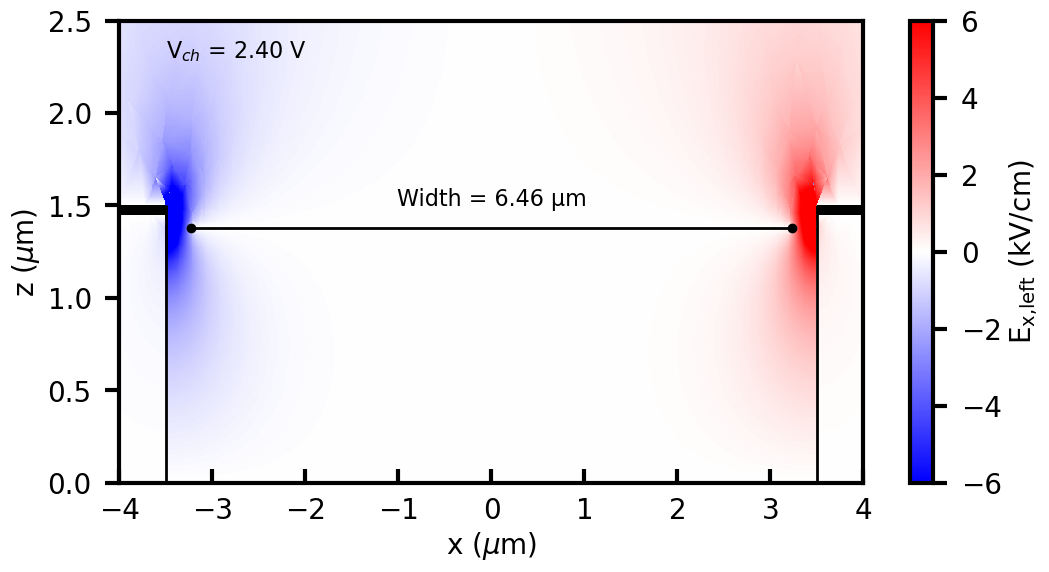

In [311]:
index = 42

fig, ax = plt.subplots(figsize=(12,6))
cmsh = plt.pcolormesh(np.unique(Ex_x),np.unique(Ex_z), Ex_matrix[:,:,index].T*1e-2*1e-3, shading='nearest', cmap='bwr', vmin=-6, vmax=6)
cbar = plt.colorbar(cmsh, label=r'E$_{\text{x,left}}$ (kV/cm)')

plt.ylim(0,2.5);
plt.xlim(-4,4)

plt.vlines( 3.5, 0, 1.5, color='black', linestyle='-', lw=2);
plt.vlines(-3.5, 0, 1.5, color='black', linestyle='-', lw=2);
plt.hlines(1.38, -width[index]/2, width[index]/2, color='black', linestyle='-', lw=2);

if width[index] > 0:
    plt.plot( width[index]/2, 1.38, 'o', markersize=6, color='black');
    plt.plot(-width[index]/2, 1.38, 'o', markersize=6, color='black');

plt.text(-3.5, 2.3, f'V$_{{ch}}$ = {V_ch[index]:.2f} V', color='black', fontsize=16, ha='left')

plt.text(0, 1.5, f'Width = {width[index]:.2f} μm', color='black', fontsize=16, ha='center')

Lgate = patches.Rectangle((-7.5, 1.45), 4, 0.05, lw=0, facecolor='black', alpha=1.0)
Rgate = patches.Rectangle(( 3.5, 1.45), 4, 0.05, lw=0, facecolor='black', alpha=1.0)

ax.add_patch(Lgate)
ax.add_patch(Rgate)

plt.ylabel(r'z ($\mu$m)')
plt.xlabel(r'x ($\mu$m)')
plt.tick_params(axis='x', direction = 'in', length = 10, width = 3, pad=10)
plt.tick_params(axis='y', direction ='out', length = 10, width = 3, pad=10)
cbar.ax.tick_params(direction ='out', length = 10, width = 3, pad=10)

#plt.savefig('.jpg', dpi=350, bbox_inches='tight')

In [313]:
for index in range(Ex_matrix.shape[2]):

    fig, ax = plt.subplots(figsize=(12,6))
    cmsh = plt.pcolormesh(np.unique(Ex_x),np.unique(Ex_z), Ex_matrix[:,:,index].T*1e-2*1e-3, shading='nearest', cmap='bwr', vmin=-6, vmax=6)
    cbar = plt.colorbar(cmsh, label=r'E$_{\text{x,left}}$ (kV/cm)')

    plt.ylim(0,2.5);
    plt.xlim(-4,4)

    plt.vlines( 3.5, 0, 1.5, color='black', linestyle='-', lw=2);
    plt.vlines(-3.5, 0, 1.5, color='black', linestyle='-', lw=2);
    plt.hlines(1.38, -width[index]/2, width[index]/2, color='black', linestyle='-', lw=2);

    if width[index] > 0:
        plt.plot( width[index]/2, 1.38, 'o', markersize=6, color='black');
        plt.plot(-width[index]/2, 1.38, 'o', markersize=6, color='black');

    plt.text(-3.5, 2.3, f'V$_{{ch}}$ = {V_ch[index]:.2f} V', color='black', fontsize=16, ha='left')

    plt.text(0, 1.5, f'Width = {width[index]:.2f} μm', color='black', fontsize=16, ha='center')

    Lgate = patches.Rectangle((-7.5, 1.45), 4, 0.05, lw=0, facecolor='black', alpha=1.0)
    Rgate = patches.Rectangle(( 3.5, 1.45), 4, 0.05, lw=0, facecolor='black', alpha=1.0)

    ax.add_patch(Lgate)
    ax.add_patch(Rgate)

    plt.ylabel(r'z ($\mu$m)')
    plt.xlabel(r'x ($\mu$m)')
    plt.tick_params(axis='x', direction = 'in', length = 10, width = 3, pad=10)
    plt.tick_params(axis='y', direction ='out', length = 10, width = 3, pad=10)
    cbar.ax.tick_params(direction ='out', length = 10, width = 3, pad=10)

    plt.savefig(f'Ex_index_{index}.jpg', dpi=350, bbox_inches='tight')
    plt.close(fig)

## Vertical Electric Field (without electrons)

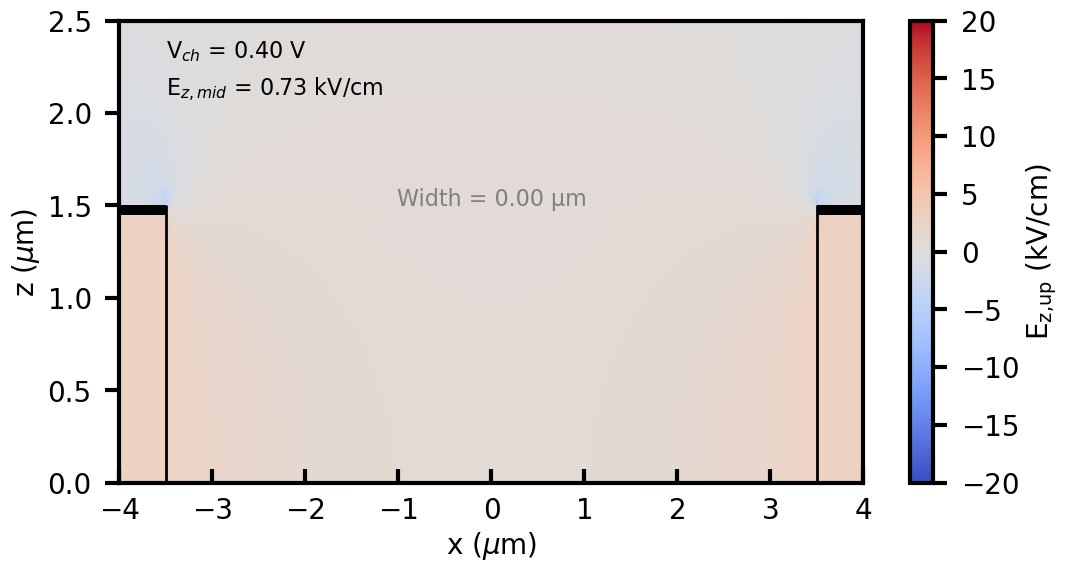

In [3]:
index = 2

fig, ax = plt.subplots(figsize=(12,6))
cmsh = plt.pcolormesh(np.unique(EzN_x),np.unique(EzN_z), EzN_matrix[:,:,index].T*1e-2*1e-3, shading='nearest', cmap='coolwarm', vmin=-20, vmax=20)
cbar = plt.colorbar(cmsh, label=r'E$_{\text{z,up}}$ (kV/cm)')

plt.ylim(0,2.5);
plt.xlim(-4,4)

plt.vlines( 3.5, 0, 1.5, color='black', linestyle='-', lw=2);
plt.vlines(-3.5, 0, 1.5, color='black', linestyle='-', lw=2);
plt.hlines(1.38, -width[index]/2, width[index]/2, color='grey', linestyle='--', lw=2);

if width[index] > 0:
    plt.plot( width[index]/2, 1.38, 'o', markersize=6, color='grey');
    plt.plot(-width[index]/2, 1.38, 'o', markersize=6, color='grey');

E_below = EzN_matrix[500,274,index].T*1e-2*1e-3 #kV/cm at z = 1.37 um
E_above = EzN_matrix[500,282,index].T*1e-2*1e-3 #kV/cm at z = 1.39 um
E_avg   = (E_below + E_above)/2

plt.text(-3.5, 2.3, f'V$_{{ch}}$ = {V_ch[index]:.2f} V', color='black', fontsize=16, ha='left')
plt.text(-3.5, 2.1, f'E$_{{z,mid}}$ = {E_avg:.2f} kV/cm', color='black', fontsize=16, ha='left')

plt.text(0, 1.5, f'Width = {width[index]:.2f} μm', color='grey', fontsize=16, ha='center')

Lgate = patches.Rectangle((-7.5, 1.45), 4, 0.05, lw=0, facecolor='black', alpha=1.0)
Rgate = patches.Rectangle(( 3.5, 1.45), 4, 0.05, lw=0, facecolor='black', alpha=1.0)

ax.add_patch(Lgate)
ax.add_patch(Rgate)

plt.ylabel(r'z ($\mu$m)')
plt.xlabel(r'x ($\mu$m)')
plt.tick_params(axis='x', direction = 'in', length = 10, width = 3, pad=10)
plt.tick_params(axis='y', direction ='out', length = 10, width = 3, pad=10)
cbar.ax.tick_params(direction ='out', length = 10, width = 3, pad=10)

#plt.savefig('.jpg', dpi=350, bbox_inches='tight')

In [4]:
for index in range(EzN_matrix.shape[2]):

    fig, ax = plt.subplots(figsize=(12,6))
    cmsh = plt.pcolormesh(np.unique(EzN_x),np.unique(EzN_z), EzN_matrix[:,:,index].T*1e-2*1e-3, shading='nearest', cmap='coolwarm', vmin=-20, vmax=20)
    cbar = plt.colorbar(cmsh, label=r'E$_{\text{z,up}}$ (kV/cm)')

    plt.ylim(0,2.5);
    plt.xlim(-4,4)

    plt.vlines( 3.5, 0, 1.5, color='black', linestyle='-', lw=2);
    plt.vlines(-3.5, 0, 1.5, color='black', linestyle='-', lw=2);
    plt.hlines(1.38, -width[index]/2, width[index]/2, color='grey', linestyle='--', lw=2);

    if width[index] > 0:
        plt.plot( width[index]/2, 1.38, 'o', markersize=6, color='grey');
        plt.plot(-width[index]/2, 1.38, 'o', markersize=6, color='grey');

    E_below = EzN_matrix[500,274,index].T*1e-2*1e-3 #kV/cm at z = 1.37 um
    E_above = EzN_matrix[500,282,index].T*1e-2*1e-3 #kV/cm at z = 1.39 um
    E_avg   = (E_below + E_above)/2

    plt.text(-3.5, 2.3, f'V$_{{ch}}$ = {V_ch[index]:.2f} V', color='black', fontsize=16, ha='left')
    plt.text(-3.5, 2.1, f'E$_{{z,mid}}$ = {E_avg:.2f} kV/cm', color='black', fontsize=16, ha='left')

    plt.text(0, 1.5, f'Width = {width[index]:.2f} μm', color='grey', fontsize=16, ha='center')

    Lgate = patches.Rectangle((-7.5, 1.45), 4, 0.05, lw=0, facecolor='black', alpha=1.0)
    Rgate = patches.Rectangle(( 3.5, 1.45), 4, 0.05, lw=0, facecolor='black', alpha=1.0)

    ax.add_patch(Lgate)
    ax.add_patch(Rgate)

    plt.ylabel(r'z ($\mu$m)')
    plt.xlabel(r'x ($\mu$m)')
    plt.tick_params(axis='x', direction = 'in', length = 10, width = 3, pad=10)
    plt.tick_params(axis='y', direction ='out', length = 10, width = 3, pad=10)
    cbar.ax.tick_params(direction ='out', length = 10, width = 3, pad=10)

    plt.savefig(f'EzN_index_{index}.jpg', dpi=350, bbox_inches='tight')
    plt.close(fig)

## Horizontal Electric Field (without electrons)

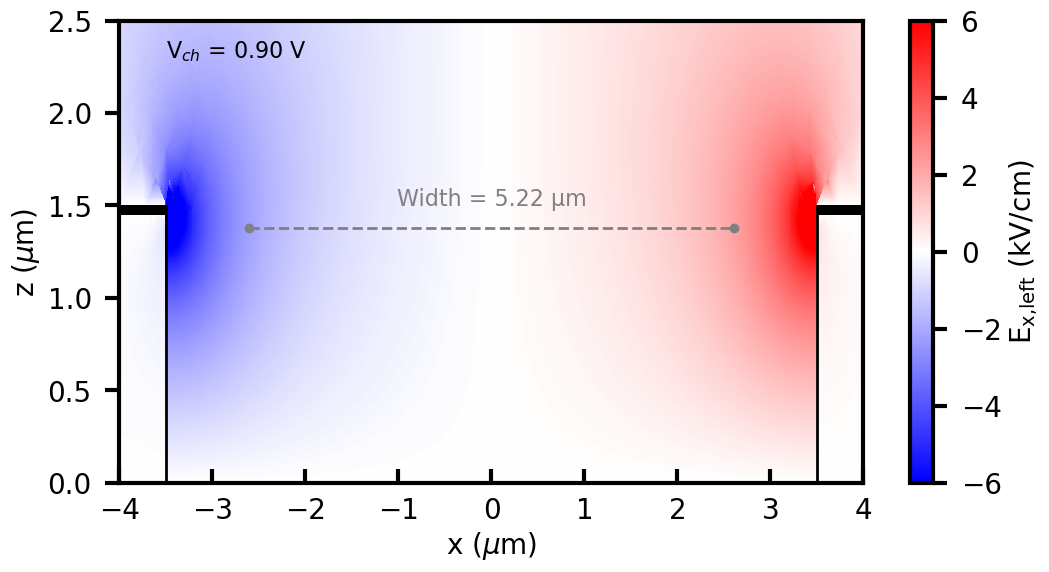

In [9]:
index = 12

fig, ax = plt.subplots(figsize=(12,6))
cmsh = plt.pcolormesh(np.unique(ExN_x),np.unique(ExN_z), ExN_matrix[:,:,index].T*1e-2*1e-3, shading='nearest', cmap='bwr', vmin=-6, vmax=6)
cbar = plt.colorbar(cmsh, label=r'E$_{\text{x,left}}$ (kV/cm)')

plt.ylim(0,2.5);
plt.xlim(-4,4)

plt.vlines( 3.5, 0, 1.5, color='black', linestyle='-', lw=2);
plt.vlines(-3.5, 0, 1.5, color='black', linestyle='-', lw=2);
plt.hlines(1.38, -width[index]/2, width[index]/2, color='grey', linestyle='--', lw=2);

if width[index] > 0:
    plt.plot( width[index]/2, 1.38, 'o', markersize=6, color='grey');
    plt.plot(-width[index]/2, 1.38, 'o', markersize=6, color='grey');

plt.text(-3.5, 2.3, f'V$_{{ch}}$ = {V_ch[index]:.2f} V', color='black', fontsize=16, ha='left')

plt.text(0, 1.5, f'Width = {width[index]:.2f} μm', color='grey', fontsize=16, ha='center')

Lgate = patches.Rectangle((-7.5, 1.45), 4, 0.05, lw=0, facecolor='black', alpha=1.0)
Rgate = patches.Rectangle(( 3.5, 1.45), 4, 0.05, lw=0, facecolor='black', alpha=1.0)

ax.add_patch(Lgate)
ax.add_patch(Rgate)

plt.ylabel(r'z ($\mu$m)')
plt.xlabel(r'x ($\mu$m)')
plt.tick_params(axis='x', direction = 'in', length = 10, width = 3, pad=10)
plt.tick_params(axis='y', direction ='out', length = 10, width = 3, pad=10)
cbar.ax.tick_params(direction ='out', length = 10, width = 3, pad=10)

#plt.savefig('.jpg', dpi=350, bbox_inches='tight')

In [11]:
for index in range(ExN_matrix.shape[2]):

    fig, ax = plt.subplots(figsize=(12,6))
    cmsh = plt.pcolormesh(np.unique(ExN_x),np.unique(ExN_z), ExN_matrix[:,:,index].T*1e-2*1e-3, shading='nearest', cmap='bwr', vmin=-6, vmax=6)
    cbar = plt.colorbar(cmsh, label=r'E$_{\text{x,left}}$ (kV/cm)')

    plt.ylim(0,2.5);
    plt.xlim(-4,4)

    plt.vlines( 3.5, 0, 1.5, color='black', linestyle='-', lw=2);
    plt.vlines(-3.5, 0, 1.5, color='black', linestyle='-', lw=2);
    plt.hlines(1.38, -width[index]/2, width[index]/2, color='grey', linestyle='--', lw=2);

    if width[index] > 0:
        plt.plot( width[index]/2, 1.38, 'o', markersize=6, color='grey');
        plt.plot(-width[index]/2, 1.38, 'o', markersize=6, color='grey');

    plt.text(-3.5, 2.3, f'V$_{{ch}}$ = {V_ch[index]:.2f} V', color='black', fontsize=16, ha='left')

    plt.text(0, 1.5, f'Width = {width[index]:.2f} μm', color='grey', fontsize=16, ha='center')

    Lgate = patches.Rectangle((-7.5, 1.45), 4, 0.05, lw=0, facecolor='black', alpha=1.0)
    Rgate = patches.Rectangle(( 3.5, 1.45), 4, 0.05, lw=0, facecolor='black', alpha=1.0)

    ax.add_patch(Lgate)
    ax.add_patch(Rgate)

    plt.ylabel(r'z ($\mu$m)')
    plt.xlabel(r'x ($\mu$m)')
    plt.tick_params(axis='x', direction = 'in', length = 10, width = 3, pad=10)
    plt.tick_params(axis='y', direction ='out', length = 10, width = 3, pad=10)
    cbar.ax.tick_params(direction ='out', length = 10, width = 3, pad=10)

    plt.savefig(f'ExN_index_{index}.jpg', dpi=350, bbox_inches='tight')
    plt.close(fig)

## FEM 2D-Density Plots

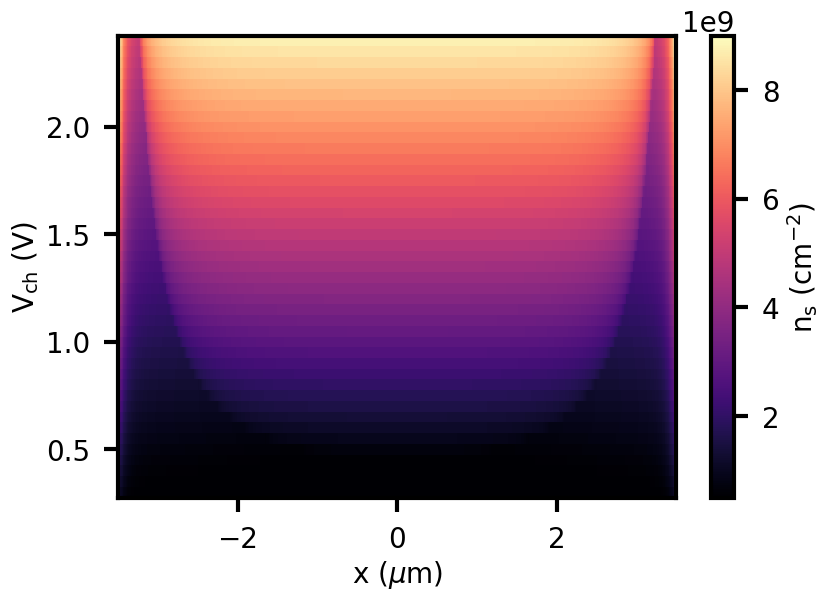

In [ ]:
fig, ax = plt.subplots(figsize=(9,6))

cmsh = plt.pcolormesh(density[:,0], V_ch, density[:,1:].T * 1e-6*1e-4, cmap='magma', shading='auto', vmax = 9e9, vmin=5e8)
cbar = plt.colorbar(cmsh, label=r'n$_{\text{s}}$ (cm$^{-2}$)')

plt.xlim(-3.5,3.5)
plt.ylabel(r'V$_{\text{ch}}$ (V)')
plt.xlabel(r'x ($\mu$m)')
plt.tick_params(axis='x', direction ='out', length = 10, width = 3, pad=10)
plt.tick_params(axis='y', direction ='out', length = 10, width = 3, pad=10)
cbar.ax.tick_params(direction ='out', length = 10, width = 3, pad=10)

#plt.savefig('Density-Vch_2D-plot.jpg', dpi=350, bbox_inches='tight')

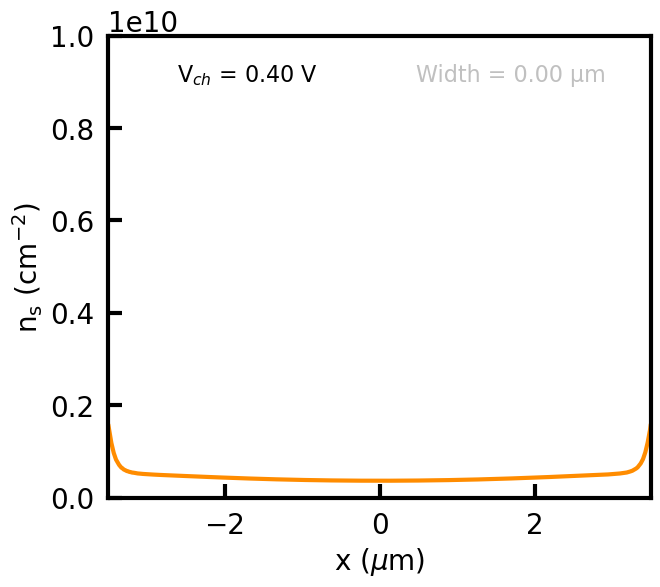

In [73]:
index = 2

plt.figure(figsize=(7,6))

if width[index] > 0:
    plt.vlines(-width[index]/2, 0, 1e10, color='silver', linestyle='--', lw=2);
    plt.vlines( width[index]/2, 0, 1e10, color='silver', linestyle='--', lw=2);

plt.plot(density[:,0], density[:,index].T*1e-10, lw=3, color='darkorange')

plt.text(-1.7, 9e9, f'V$_{{ch}}$ = {V_ch[index]:.2f} V', color='black', fontsize=16, ha='center')
plt.text( 1.7, 9e9, f'Width = {width[index]:.2f} μm', color='silver', fontsize=16, ha='center')

plt.xlim(-3.5,3.5)
plt.ylim(0,1e10)

plt.ylabel(r'n$_{\text{s}}$ (cm$^{-2}$)')
plt.xlabel(r'x ($\mu$m)')
plt.tick_params(axis='x', direction = 'in', length = 10, width = 3, pad=10)
plt.tick_params(axis='y', direction = 'in', length = 10, width = 3, pad=10)

In [77]:
for index in range(V_ch.shape[0]):

    fig = plt.figure(figsize=(7,6))

    if width[index] > 0:
        plt.vlines(-width[index]/2, 0, 1e10, color='silver', linestyle='--', lw=2);
        plt.vlines( width[index]/2, 0, 1e10, color='silver', linestyle='--', lw=2);

    plt.plot(density[:,0], density[:,index].T*1e-10, lw=3, color='darkorange')

    plt.text(-1.7, 9e9, f'V$_{{ch}}$ = {V_ch[index]:.2f} V', color='black', fontsize=16, ha='center')
    plt.text( 1.7, 9e9, f'Width = {width[index]:.2f} μm', color='silver', fontsize=16, ha='center')

    plt.xlim(-3.5,3.5)
    plt.ylim(0,1e10)

    plt.ylabel(r'n$_{\text{s}}$ (cm$^{-2}$)')
    plt.xlabel(r'x ($\mu$m)')
    plt.tick_params(axis='x', direction = 'in', length = 10, width = 3, pad=10)
    plt.tick_params(axis='y', direction = 'in', length = 10, width = 3, pad=10)

    #plt.savefig(f'density_index_{index}.jpg', dpi=350, bbox_inches='tight')
    plt.close(fig)

## Other FEM Plots

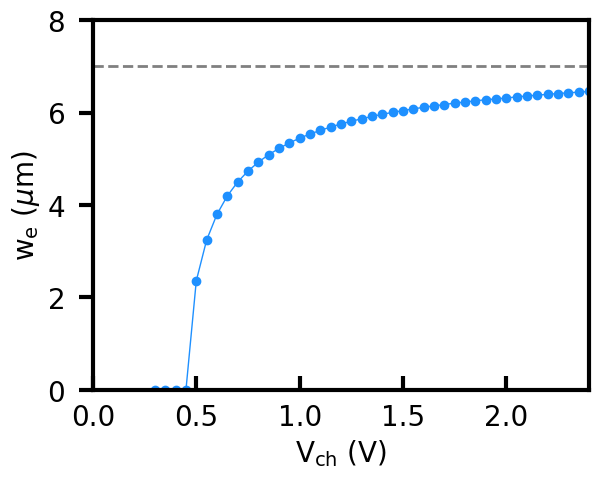

In [81]:
plt.plot(V_ch, width,'o-', lw=1, markersize=6, color='dodgerblue')
plt.hlines(7, 0, 2.5, color='grey', linestyle='--', lw=2)

plt.ylim(0,8)
plt.xlim(0,2.4)
plt.ylabel(r'w$_{\text{e}}$ ($\mu$m)')
plt.xlabel(r'V$_{\text{ch}}$ (V)')
plt.tick_params(axis='x', direction = 'in', length = 10, width = 3, pad=10)
plt.tick_params(axis='y', direction ='out', length = 10, width = 3, pad=10)

#plt.savefig('Effective-width_1D.jpg', dpi=350, bbox_inches='tight')